In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [2]:
df = pd.read_csv("data.csv")

(0.0, 9.0)

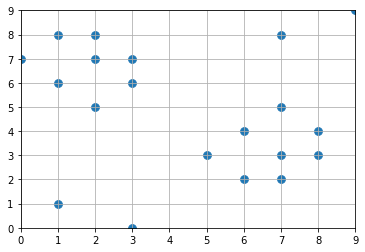

In [3]:
plt.scatter(df['x'], df['y'], s=60)
plt.grid()
plt.xlim(0, 9)
plt.ylim(0, 9)

## K_Means and K_Mediods

In [4]:
# euclidean distance
def euc_dist(point1, point2):
    return math.sqrt(((point1['x'] - point2['x'])**2) + ((point1['y'] - point2['y']) **2))

In [5]:
# initialize clusters randomly
def initialize_clusters(k, data):
    # initialize cluster names and data dict
    c_names = ["C"+str(i+1) for i in range(k)]
    d = {'c_name': c_names, 'x': [], 'y': []}
    
    # choose a random index from the data as initial mean
    mean_points = []
    for i in range(len(c_names)):
        ind = random.randrange(0, data.shape[0])
        while(ind in mean_points):
            ind = random.randrange(0, data.shape[0])
        
        # append it to the cluster data dict and record used point
        mean_points.append(ind)
        d['x'].append(data.iloc[ind]['x'])
        d['y'].append(data.iloc[ind]['y'])
    
    #create cluster dataframe
    clusters = pd.DataFrame(data=d)
    
    return clusters

In [6]:
# assign data point to cluster with min distance
def assign_class(data, clusters, result_df):
    # for each data point
    for i in data.index:
        # initialize the mini variable and save associated class name
        mini = euc_dist(data.iloc[i], clusters.iloc[0])
        miniC = clusters.loc[0, 'c_name']

        # for each cluster
        for j in clusters.index:
            # calculate the data point's distance from the cluster
            calc = euc_dist(data.iloc[i], clusters.iloc[j])

            # if it's less than the previously saved cluster,
            # update the variables
            if(calc < mini):
                mini = calc
                miniC = clusters.loc[j, 'c_name']

        # save the cluster with the minimum distance as the data points class
        result_df.loc[i, 'class'] = miniC
    return result_df

In [7]:
# problem 2 - k-mediods
def update_mediod(cluster, old_mediod):
    newCluster = cluster.copy()
    newCluster = newCluster.reset_index(drop = True)
    
    mini = float('inf')
    new_mediod = old_mediod
    
    for i in newCluster.index:
        sum_cost = 0
        for j in newCluster.index:
            sum_cost += euc_dist(newCluster.iloc[i], newCluster.iloc[j])
        if(sum_cost < mini):
            mini = sum_cost
            new_mediod = [newCluster.loc[i, 'x'], newCluster.loc[i, 'y']]
    
    return new_mediod

In [8]:
# problem 1 and 2 (solve for either k_means or k_mediods)
def k_classify(k, data, typeK):
    
    # create cluster dataframe
    clusters = initialize_clusters(k, data)
    
    # initialize class column in data
    result_df = data.copy()
    result_df['class'] = ''
    
    # used to determine termination condition
    anyChange = True
    iteration = 1;
    
    while(anyChange):
        # record previous class assignment
        prevClass = result_df['class'].copy()
        
        # assign clusters to each data point
        result_df = assign_class(data, clusters, result_df)
        
        # once all data points are updated, check to see if it differs from previous
        # classification. If not, then set terminating condition false and end loop
        if((result_df['class'] == prevClass).all()):
            anyChange = False
            break
        
        # update the clusters
        for i in clusters.index:
            cluster_data = result_df[result_df['class'] == clusters.loc[i, 'c_name']].copy()            
            
            # update the cluster mean
            if(typeK == "means"):
                clusters.loc[i, 'x'] = (sum(cluster_data['x'])/cluster_data.shape[0])
                clusters.loc[i, 'y'] = (sum(cluster_data['y'])/cluster_data.shape[0])
                
            # update the cluster mediod    
            elif(typeK == "mediods"):
                mediod = update_mediod(cluster_data, [clusters.loc[i, 'x'], clusters.loc[i, 'y']])
                clusters.loc[i, 'x'] = mediod[0]
                clusters.loc[i, 'y'] = mediod[1]

        plt.figure(figsize=(5, 5))

        # plot the data points and color them based on class
        plt.scatter(result_df['x'], result_df['y'], c=result_df['class'], s=80)

        # plot the new cluster means
        plt.scatter(clusters['x'], clusters['y'], edgecolors=clusters['c_name'], c="Black", s=100)
        
        plt.title("Iteration " + str(iteration)) 
        plt.grid()
        plt.xlim(0, 9)
        plt.ylim(0, 9)
        plt.show()
        
        # print cluster means
        if(typeK == "means"):
            print("Cluster Means:")
        elif(typeK == "mediods"):
            print("Cluster Mediods:")
        print(*[(clusters.loc[i, 'c_name'] + ": (" + str(clusters.loc[i, 'x']) + ", " + str(clusters.loc[i, 'y']) + ")") for i in clusters.index], sep="\n")
        print(" ")
        
        #update iteration counter
        iteration += 1
    
    return clusters, result_df

### K_Means

In [9]:
df_kmeans = df.copy()

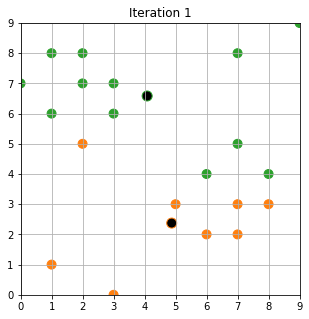

Cluster Means:
C1: (4.875, 2.375)
C2: (4.083333333333333, 6.583333333333333)
 


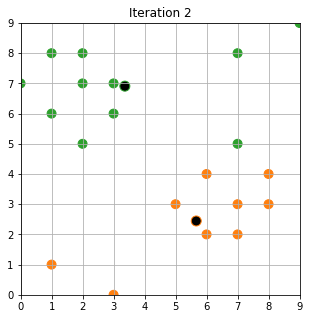

Cluster Means:
C1: (5.666666666666667, 2.4444444444444446)
C2: (3.3636363636363638, 6.909090909090909)
 


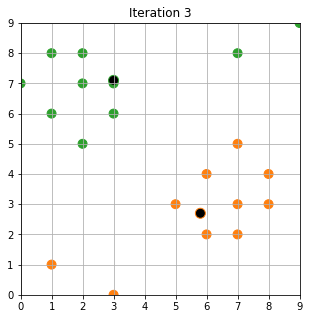

Cluster Means:
C1: (5.8, 2.7)
C2: (3.0, 7.1)
 


In [10]:
clusters_kmeans, updated_df_kmeans = k_classify(2, df_kmeans, "means")

### K_Mediods

In [11]:
df_kmediods = df.copy()

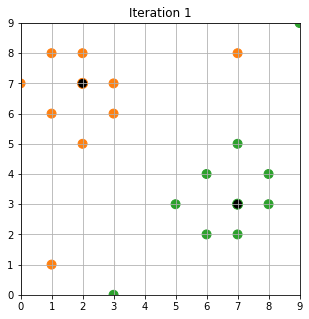

Cluster Mediods:
C1: (2, 7)
C2: (7, 3)
 


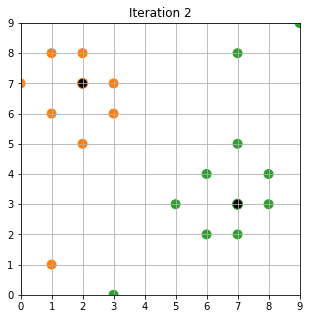

Cluster Mediods:
C1: (2, 7)
C2: (7, 3)
 


In [12]:
clusters_kmediods, updated_df_kmediods = k_classify(2, df_kmediods, "mediods")